In [1]:
import pickle
import numpy as np

class CaptchaSolver:
    rects = []
    kmeans1 = None
    groups1 = None
    kmeans2 = None
    groups2 = None
    kmeans3 = None
    groups3 = None
    kmeans4 = None
    groups4 = None
    def predict( self, im ):
        display(im)
        def predictdigit( di, kmeans, groups ) :
            display(di)
            return groups[kmeans.predict( [np.array(di.convert("L").getdata()) ] )[0]]
        result =  predictdigit( im.copy().crop(self.rects[0]), self.kmeans1, self.groups1 )
        result += predictdigit( im.copy().crop(self.rects[1]), self.kmeans2, self.groups2 )
        result += predictdigit( im.copy().crop(self.rects[2]), self.kmeans3, self.groups3 )
        result += predictdigit( im.copy().crop(self.rects[3]), self.kmeans4, self.groups4 )
        return result

solver = pickle.load( open( "solver.p", "rb" ) )

In [2]:
import os
from PIL import Image

dirname = "data"
ims = []
filenames = []
for filename in os.listdir(dirname) :
    filenames.append(filename)
    fullname = os.path.join(dirname, filename)
    #print(fullname)
    im = Image.open(fullname)
    #display(im)
    ims.append(im)
print("images : " + str(len(ims)))

images : 298


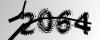

'2064'

In [3]:
solver.predict( ims[-1] )

# FastAPI implementation

In [4]:
# Basic import of FastAPI and function to start running the API with Uvicorn

import uvicorn
from fastapi import FastAPI

app = FastAPI()

def run():
    uvicorn.run(app)

In [5]:
# Code in this cell is just for (re)starting the API on a Process, and other compatibility stuff with Jupyter cells.
# Just ignore it!

from multiprocessing import Process
from wait4it import wait_for

_api_process = None

def start_api():
    """Stop the API if running; Start the API; Wait until API (port) is available (reachable)"""
    global _api_process
    if _api_process:
        _api_process.terminate()
        _api_process.join()
    
    _api_process = Process(target=run, daemon=True)
    _api_process.start()
    wait_for(port=8000)

def delete_route(method: str, path: str):
    """Delete the given route from the API. This must be called on cells that re-define a route"""
    [app.routes.remove(route) for route in app.routes if method in route.methods and route.path == path]

INFO:     Started server process [514]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


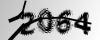

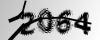

{'result': '2064'}
INFO:     127.0.0.1:60952 - "POST /captcha HTTP/1.1" 200 OK


In [6]:
from pydantic import BaseModel
from typing import List
from typing import Optional
from PIL import Image
import io
import base64

class Captcha(BaseModel):
    url: str
    imagedata: str

@app.post("/captcha")
def solve_captcha(captcha: Captcha):
    #print(base64.b64decode(captcha.imagedata))
    im = Image.open(io.BytesIO(base64.b64decode(captcha.imagedata))).convert("RGB")
    display(im)
    result = {'result' : solver.predict( im )}
    print(result)
    return dict(result)

start_api()